<a href="https://colab.research.google.com/github/BigWillieStyle/Python-Projects/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F



In [9]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
      super().__init__()
      self.fc1 = nn.Linear(in_features, h1)
      self.fc2 = nn.Linear(h1, h2)
      self.out = nn.Linear(h2, out_features)

    def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)
      return x

In [10]:
torch.manual_seed(42)
model = Model()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [15]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
my_df['species'] = my_df['species'].map({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [17]:
x = my_df.drop('species', axis=1).values
y = my_df['species'].values

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [30]:
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'epoch: {i} loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.04675566032528877
epoch: 10 loss: 0.0467354878783226
epoch: 20 loss: 0.046726856380701065
epoch: 30 loss: 0.046720247715711594
epoch: 40 loss: 0.046713389456272125
epoch: 50 loss: 0.046707190573215485
epoch: 60 loss: 0.04670143127441406
epoch: 70 loss: 0.046696051955223083
epoch: 80 loss: 0.04669101908802986
epoch: 90 loss: 0.04668628051877022


Text(0.5, 0, 'Epoch')

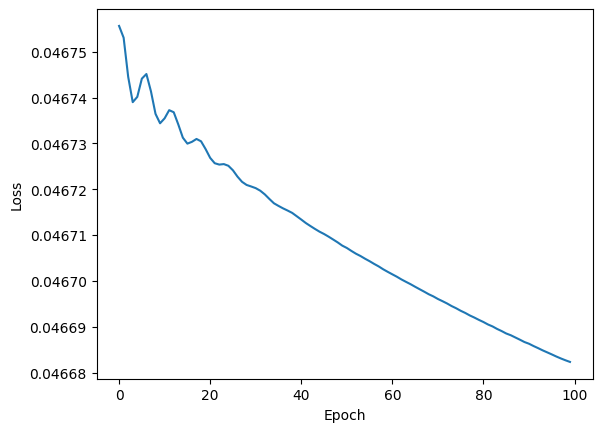

In [31]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')